# Bike Share System Data

Divvy is Chicago's bike share system, with over 600 stations and 6,000+ bikes across Chicagoland. 
Historical trip data available to the public was taken from https://ride.divvybikes.com/system-data

The idea of business task for analysis was taken from the course "Google Data Analytics Professional Certificate"

Business task.
The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, data analyst team wants to understand how casual riders and annual members use Divvy bikes differently. 

There are 3 main questions:
1. How do annual members and casual riders use Divyy bikes differently?
2. Why would casual riders buy Divyy annual memberships?
3. How can Divvy use digital media to influence casual riders to become members?

We hava data for 12 months of 2022.

In [71]:
#import libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Import and prepare data

In [72]:
# import data per month

df_01 = pd.read_csv('202201-divvy-tripdata.csv')
df_02 = pd.read_csv('202202-divvy-tripdata.csv')
df_03 = pd.read_csv('202203-divvy-tripdata.csv')
df_04 = pd.read_csv('202204-divvy-tripdata.csv')
df_05 = pd.read_csv('202205-divvy-tripdata.csv')
df_06 = pd.read_csv('202206-divvy-tripdata.csv')
df_07 = pd.read_csv('202207-divvy-tripdata.csv')
df_08 = pd.read_csv('202208-divvy-tripdata.csv')
df_09 = pd.read_csv('202209-divvy-tripdata.csv')
df_10 = pd.read_csv('202210-divvy-tripdata.csv')
df_11 = pd.read_csv('202211-divvy-tripdata.csv')
df_12 = pd.read_csv('202212-divvy-tripdata.csv')

In [73]:
# Qiuck view 

df_01.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [74]:
# Check column names for every months. Can we concat?

list_of_df = [df_01, df_02, df_03, df_04, df_05, df_06, df_07, df_08, df_09, df_10, df_11, df_12]

for i in range(11):
    print(list_of_df[i].columns, "\n")
    

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object') 

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object') 

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object') 

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='obj

In [75]:
# Concatenate per month data to the one annual df

df = pd.concat(list_of_df, ignore_index=True)


## Prepare and clean data

In [76]:
print(df.shape)
display(df.tail())

(5667717, 13)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5667712,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
5667713,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member
5667714,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member
5667715,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
5667716,2DD1587210BA45AE,classic_bike,2022-12-09 00:27:25,2022-12-09 00:35:28,Southport Ave & Waveland Ave,13235,Seeley Ave & Roscoe St,13144,41.948150,-87.663940,41.943403,-87.679618,casual


In [77]:
# Are there any duplicate rides?

df.duplicated().sum()

0

In [78]:
# Drop columns that are irrelevant to analysis

df = df.drop(df.columns[[5,7,8,9,10,11]], axis=1)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,member


In [79]:
# Check data types

print(df.dtypes)

ride_id               object
rideable_type         object
started_at            object
ended_at              object
start_station_name    object
end_station_name      object
member_casual         object
dtype: object


In [80]:
# Are there any NaN values in df?

df_NaN_True = df.isna()
df_NaN_True.sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
end_station_name      892742
member_casual              0
dtype: int64

There are missed values in two columns: start_station_name and end_station_name. But we will not drop rows with missed values because values from other columns of this rows can be useful for us.

#### Explore categorical columns

In [81]:
# Unique values

print(df.loc[:,'rideable_type'].unique())
print(df.loc[:,'member_casual'].unique())
print(df.loc[:,'start_station_name'].unique())
print(df.loc[:,'end_station_name'].unique())

['electric_bike' 'classic_bike' 'docked_bike']
['casual' 'member']
['Glenwood Ave & Touhy Ave' 'Sheffield Ave & Fullerton Ave'
 'Clark St & Bryn Mawr Ave' ... 'Public Rack - Ellis Ave & Doty Ave'
 'Public Rack - Ewing Ave & 96th St S'
 'Public Rack - Brighton Park Branch Chicago Library']
['Clark St & Touhy Ave' 'Greenview Ave & Fullerton Ave'
 'Paulina St & Montrose Ave' ...
 'Public Rack - Newcastle Ave & Wellington Ave'
 'Public Rack - Brighton Park Branch Chicago Library'
 'Public Rack - Commercial Ave & 89th St']


In [82]:
# Change data types of cat cols to category

df.loc[:,'rideable_type'] = df.loc[:,'rideable_type'].astype('category')
df.loc[:,'member_casual'] = df.loc[:,'member_casual'].astype('category')
df.loc[:,'start_station_name'] = df.loc[:,'start_station_name'].astype('category')
df.loc[:,'end_station_name'] = df.loc[:,'end_station_name'].astype('category')

#### Explore other columns

In [83]:
# Change data types of columns with date to datetime

df.loc[:, 'started_at'] = df.loc[:, 'started_at'].astype('datetime64')
df.loc[:, 'ended_at'] = df.loc[:, 'ended_at'].astype('datetime64')

In [84]:
import datetime as dt

In [85]:
# Add new columns: duration (in seconds), day_of_week, month and hour

df['duration'] = (df['ended_at']-df['started_at']).dt.seconds
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,duration
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,177
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,261
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,261
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,896
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,member,362


In [86]:
df.loc[:, 'day_of_week'] = df.loc[:, 'started_at'].dt.day_name()
df.loc[:, 'month'] = df.loc[:, 'started_at'].dt.month_name()
df.loc[:,'start_hour'] = df['started_at'].dt.hour
display(df.head())
print(df.dtypes)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,duration,day_of_week,month,start_hour
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,177,Thursday,January,11
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,261,Monday,January,8
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,261,Tuesday,January,4
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,896,Tuesday,January,0
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,member,362,Thursday,January,1


ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name          category
end_station_name            category
member_casual               category
duration                       int64
day_of_week                   object
month                         object
start_hour                     int64
dtype: object


In [87]:
# Change dtypes of day_of_week and month to category
df.loc[:,'day_of_week'] = df.loc[:,'day_of_week'].astype('category')
df.loc[:,'month'] = df.loc[:,'month'].astype('category')
df.loc[:,'start_hour'] = df.loc[:,'start_hour'].astype('category')

print(df.loc[:,'day_of_week'].unique(), "\n")
print(df.loc[:,'month'].unique(), "\n")
print(df.dtypes)

['Thursday', 'Monday', 'Tuesday', 'Sunday', 'Saturday', 'Friday', 'Wednesday']
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

['January', 'February', 'March', 'April', 'May', ..., 'August', 'September', 'October', 'November', 'December']
Length: 12
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November', 'October', 'September'] 

ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name          category
end_station_name            category
member_casual               category
duration                       int64
day_of_week                 category
month                       category
start_hour                  category
dtype: object


Check for any rides that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure). 

In [88]:
# Check duration column

short_duration = df[df['duration'] <= 60]
print(short_duration.shape)
display(short_duration.head(10))

(122184, 11)


,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,duration,day_of_week,month,start_hour
15,7DD70C4AA0F3EA7B,classic_bike,2022-01-14 05:47:07,2022-01-14 05:47:39,Lincoln Park Conservatory,Lincoln Park Conservatory,member,32,Friday,January,5
73,64CA42FCA02E5148,classic_bike,2022-01-12 14:37:54,2022-01-12 14:38:07,State St & Pearson St,State St & Pearson St,member,13,Wednesday,January,14
123,22096565E8AF075C,classic_bike,2022-01-14 16:10:37,2022-01-14 16:10:45,Clinton St & Lake St,Clinton St & Lake St,member,8,Friday,January,16
158,DB3BD626BB3253C9,classic_bike,2022-01-02 07:27:56,2022-01-02 07:28:00,Lincoln Ave & Waveland Ave,Lincoln Ave & Waveland Ave,member,4,Sunday,January,7
203,B0F160012485900B,classic_bike,2022-01-10 07:28:27,2022-01-10 07:28:28,Financial Pl & Ida B Wells Dr,Financial Pl & Ida B Wells Dr,member,1,Monday,January,7
363,02DFA017BD04E1B0,classic_bike,2022-01-14 19:51:09,2022-01-14 19:51:11,Western Ave & 21st St,Western Ave & 21st St,member,2,Friday,January,19
383,A69A4426736E0C55,electric_bike,2022-01-03 15:26:08,2022-01-03 15:27:04,LaSalle St & Jackson Blvd,LaSalle St & Adams St,member,56,Monday,January,15
424,13F048AECD77625B,classic_bike,2022-01-22 13:21:32,2022-01-22 13:22:13,Michigan Ave & Jackson Blvd,Michigan Ave & Jackson Blvd,casual,41,Saturday,January,13
457,112F552C81162CB8,electric_bike,2022-01-14 13:13:24,2022-01-14 13:13:36,Rush St & Superior St,Rush St & Superior St,member,12,Friday,January,13
559,96069A736600ED71,classic_bike,2022-01-25 15:10:48,2022-01-25 15:11:01,Halsted St & Willow St,Halsted St & Willow St,member,13,Tuesday,January,15


In [89]:
# Drop rows with trip length less than 60 seconds

df = df.drop(df[df.duration < 60].index)
df.shape

(5546727, 11)

In [90]:
df.to_csv('bikeshare_2022_cleaned.csv')

## Analyse



How do annual members and casual riders use Divyy bikes differently?

In [91]:
# Find percentage of member trips and casual trips 

pd.crosstab(index=df.loc[:, 'member_casual'],
           columns='count',
           normalize='columns')

col_0,count
member_casual,
casual,0.410007
member,0.589993


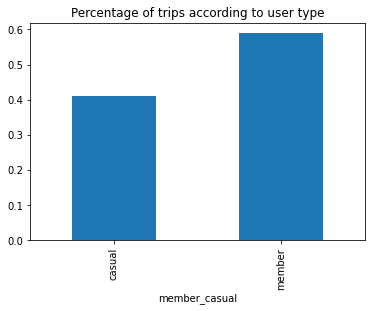

In [92]:
# Create a plot 

pd.crosstab(index=df.loc[:, 'member_casual'],
           columns='count',
           normalize='columns').plot(kind='bar', 
                                     title='Percentage of trips according to user type', 
                                     legend=False);

Here we can see that percentage of rides that was made by customers who have annual memberships is bigger than casual customers rides. 59 % of all rides are made by customers who have annual memberships. 41 % rides are casual customers rides.

In [93]:
# See basic statistical summary for duration of rides divided by members and casual users

df.groupby('member_casual')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2274196.0,1370.921024,2705.596831,60.0,458.0,798.0,1469.0,86399.0
member,3272531.0,761.595141,1183.071525,60.0,319.0,542.0,929.0,86399.0


The avarage duration of casual users rides is bigger than the average ride duration of users with membership. 
But we also see that max value of ride duration is 86399 seconds. This value is equal to 24 hours. This means that customers use day pass. This affects the average length of trips. But at the same time we see than duration of customer users rides in second and third quartiles is longer than duration of member users trips.


In [94]:
# Let's check how many day passes buy members and customers.

long_duration = df[df['duration'] >= 82800]
print(long_duration.shape)
long_duration.groupby('member_casual')['ride_id'].count()

(237, 11)


member_casual
casual    178
member     59
Name: ride_id, dtype: int64

Casual users buy a day ticket more often.

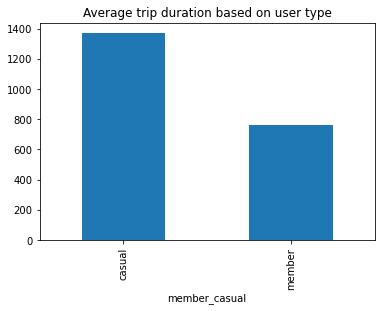

In [95]:
# Plot a graph that shows the difference between the average trip durations 
# of users who have Membership and those who not.

df.groupby('member_casual')['duration'].mean().plot(kind='bar', 
                                                    title='Average trip duration based on user type',
                                                   legend=False);

From the above bar graph we see that average duration of casual users trips is longer than average length of users who are member.

We explored earlier that total number of casual user rides is smaller than the number of member user rides.
So we can conclude that users who have annual membership make rides more often, but their overall duration is shorter.  And casual users make longer trips but the total number is less. 

Based on this, we can make assumptions that users who have a membership use rides for regular daily purposes, while casual users make rides for certain special events. Let's try to investigate further whether this assumption is true.

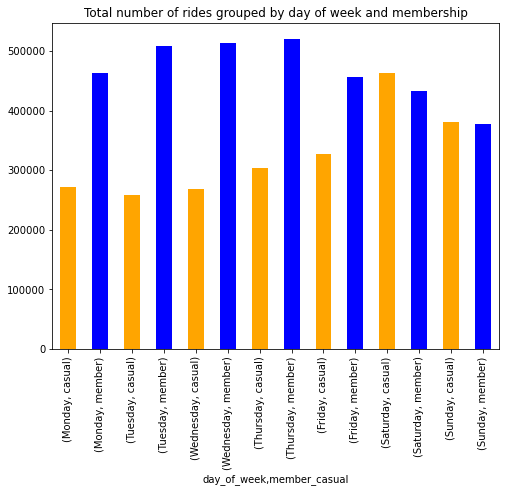

In [96]:
# Total number of rides grouped by day of week and membership. Make a chart
 
bar_colors = ['orange', 'blue']
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df.groupby(['day_of_week', 'member_casual'])['ride_id'].count().loc[day_order].plot(kind='bar', 
                                                                                    color=bar_colors, 
                                                                                    figsize=[8,6],
                                                                                    title='Total number of rides grouped by day of week and membership');

So now we can claim that on workdays the number of rides by customers who have a membership is much bigger than the number of casual users rides. But on Saturday and Sunday the number of rides of casual users increase and become bigger than membership rides.
That's why we can prove our assumption that users who have a membership use rides for regular dialy purposes, while casual users make trips for certain special events.

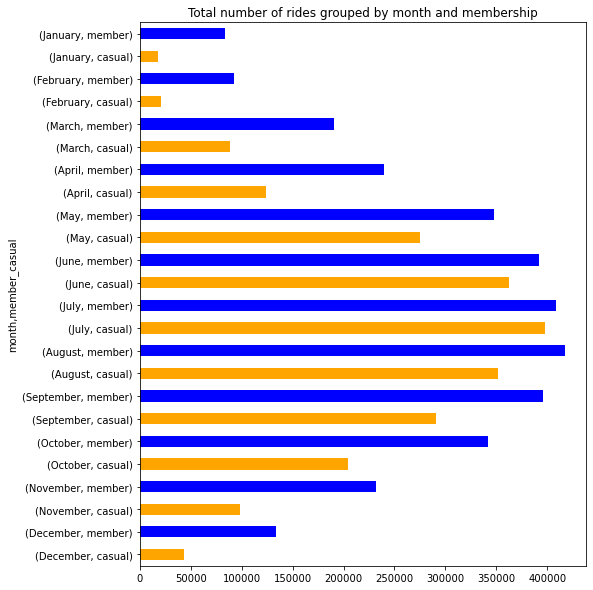

In [97]:
# Total number of rides grouped by month and membership
months_order = ['December', 'November', 'October', 'September', 'August','July', 'June', 'May', 'April', 'March',  'February', 'January'] 
df.groupby(['month','member_casual'])['ride_id'].count().loc[months_order].plot(kind='barh',
                                                                                color=bar_colors,
                                                                                figsize=[8,10],
                                                                                title='Total number of rides grouped by month and membership');


As could be predicted, the number of rides depends on the season. In general, users who have a membership always make more bike tripes than those who not. Only in a warm months the number of rides by casual users approaches the number of rides by users who have memberships. This once again confirms the fact that users who do not have a membership mainly use bikes for entertainment trips and pleasure.

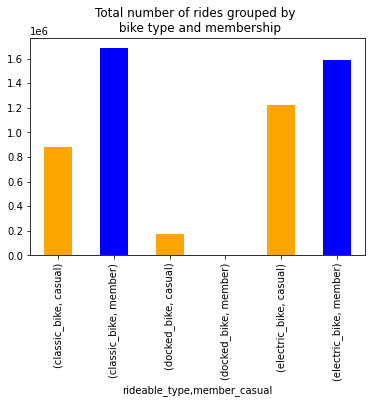

In [98]:
# Total number of rides grouped by type of byke and membership
df.groupby(['rideable_type','member_casual'])['ride_id'].count().plot(kind='bar',
                                                                      color=bar_colors,
                                                                      title='Total number of rides grouped by \n bike type and membership');


Here we do not see a big difference between the type of bikes used by members and customers. We know that total nimber of trips created by members is bigger than the total number of trips by casual users. And we see the same trend here.

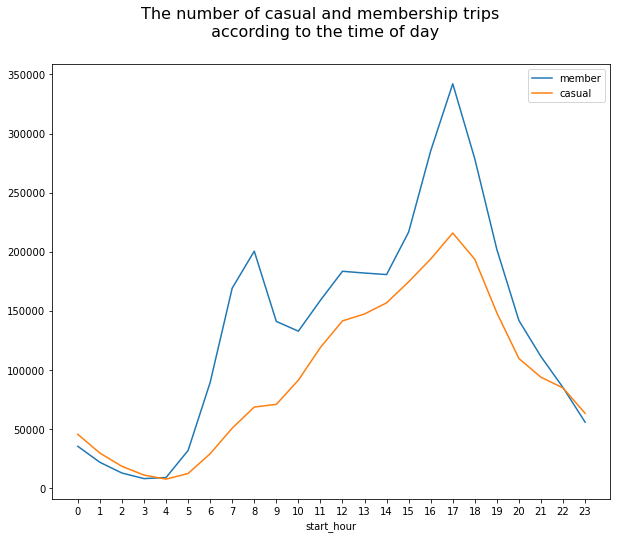

In [132]:
# Explore in what time of the day casual and member users do rides

df_member = df[df['member_casual'] == 'member']
df_member = df_member.loc[:, ['start_hour', 'member_casual']]
df_member.rename(columns = {'member_casual':'member'}, inplace = True) 

df_casual = df[df['member_casual'] == 'casual']
df_casual = df_casual.loc[:, ['start_hour', 'member_casual']]
df_casual.rename(columns = {'member_casual':'casual'}, inplace = True) 

fig, ax = plt.subplots(figsize = [10,8])
fig.suptitle('The number of casual and membership trips \n according to the time of day', size=16)
df_member.groupby('start_hour').count().plot(ax=ax);
df_casual.groupby('start_hour').count().plot(ax=ax);
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
ax.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]);

From the above line graph we see that most member rides are from 7 to 8 am, and from 4 to 8 pm.
If we look at casual users rides we see that they also make rides from 4 to 8 pm, but the number of morning rides is very low. This is another proof that users who have a membership are people who work and use bicycles for going on work.

In [130]:
# Define most popular start stations and end stations 

start_station_count = df.groupby(['start_station_name','member_casual'], as_index=False)['ride_id'].count()
start_station_count = start_station_count.sort_values('ride_id', ascending=False)
popular_member_streets = start_station_count[start_station_count['member_casual'] == 'member']
popular_casual_streets = start_station_count[start_station_count['member_casual'] == 'casual']
popular_member_streets = popular_member_streets.reset_index()
popular_casual_streets = popular_casual_streets.reset_index()
display(popular_casual_streets.head(10))
display(popular_member_streets.head(10))

,index,start_station_name,member_casual,ride_id
0,3026,Streeter Dr & Grand Ave,casual,57075
1,708,DuSable Lake Shore Dr & Monroe St,casual,31329
2,1594,Millennium Park,casual,25086
3,1580,Michigan Ave & Oak St,casual,24865
4,710,DuSable Lake Shore Dr & North Blvd,casual,23179
5,2854,Shedd Aquarium,casual,19898
6,3036,Theater on the Lake,casual,18217
7,3164,Wells St & Concord Ln,casual,15988
8,716,Dusable Harbor,casual,13875
9,468,Clark St & Armitage Ave,casual,13603


,index,start_station_name,member_casual,ride_id
0,1217,Kingsbury St & Kinzie St,member,24511
1,481,Clark St & Elm St,member,21616
2,3165,Wells St & Concord Ln,member,20956
3,3077,University Ave & 57th St,member,19537
4,535,Clinton St & Washington Blvd,member,19376
5,763,Ellis Ave & 60th St,member,19108
6,3167,Wells St & Elm St,member,18676
7,1431,Loomis St & Lexington St,member,18656
8,527,Clinton St & Madison St,member,18483
9,219,Broadway & Barry Ave,member,17496


2 lists with 10 most popular start streets among members and casuals were produced. On that stations company can make special advertising campaigns for different types of users.

So, main points in differences of using bikes by annual members and casual users are:

* Overall number of trips by members is bigger than be casual users, the percentage is 59% and 41%, respectively.
* Average duration of casual users trips is longer than average length of users who are member. So we can conclude that users who have annual membership make rides more often, but their overall duration is shorter. And casual users make longer rides but the total number is less.
* On workdays the number of rides by customers who have a membership is much bigger than the number of casual users rides. But on Saturday and Sunday the number of rides of casual users increase and become bigger than membership rides. It meansthat users who have membership mostly use rides for regular dialy purposes, while casual users make trips for certain special events.
* The number of rides depends on the season. In cold months the number of trips is significantly reduced. However, the number of trips by users who have a membership is still much higher. In warm months the number of rides by casual users approaches the number of rides by users who have memberships. This once again confirms the fact that users who do not have a membership mainly use bikes for entertainment trips and pleasure. 
* From the above line graph we see that most member rides are from 7 to 8 am, and from 4 to 8 pm. If we look at casual users rides we see that they also make rides from 4 to 8 pm, but the number of morning rides is very low. This is another proof that users who have a membership are people who work and use bicycles for going on work.

Another question is why would casual riders buy Divyy annual memberships. 
As we can conclude from our analysis since casual users mainly use bicycles during non-working hours, for them it is possible to introduce a promotion, according to which new program participants will receive special discounts for trips on weekends. Also, the company can try to attract a larger number of users to the membership among those who want to change their commute to work. For example, introduce a special tariff for electric bikes from 6 to 9 in the morning. Company can make special advertising campaigns for different types of users on the most popular stations among the certain type of users.

How can Divvy use digital media to influence casual riders to become members?
The company can send messages on the Divvy App to casual rides and make some special propositions for them, discounts for long rides, membership for summer time, for example it can be membership for 1 or 3 months.
